**基本介绍**

HMM，隐马尔科夫链，主要用于解决时序问题。描述了由一个隐藏的马尔可夫链随机生成不可观测的状态随机序列，再由各个状态生成一个观测而产生观测随机序列的过程。其中，状态序列表示为$Q={q_1,q_2,...,q_N}$;观测序列表示为$V={v_1,v2,...,v_M}$。

初始的状态向量为$\pi={\pi_1, \pi_2...,\pi_N}$，状态间的转移概率为$\alpha_{i,j}=P(q_{t+1}=q_j|q_{t}=q_i)$，发射概率，即由状态$i$得到观测$k$的概率为$b_{i,k}=P(o_t=o_k|q_t=q_i)$


隐马尔科夫的三个问题：

1、概率计算问题，即给出模型$\lambda=(A, B, \pi)$和观测序列$O=\{o_1, o_2,...,o_T\}$，求在该模型下产生观测O的概率$P(O|\lambda)$。

2、学习问题，即给出观测序列$O=\{o_1, o_2,...,o_T\}$，求使$P(O|\lambda)$最大的模型参数$\lambda=(A, B, \pi)$。

3、状态求解问题，即给出模型$\lambda=(A, B, \pi)$和观测序列$O=\{o_1, o_2,...,o_T\}$，求最有可能的状态转移序列$I$


参考：https://applenob.github.io/machine_learning/HMM/

**Q1:概率计算问题中，直接按照状态转移和观测序列求解行不行？**

不行，复杂度过高。

在某一条转移路线下，出现观测序列的概率为$P(O|I, \lambda)=b_{i_1}(o_1)*b_{i_2}(o_2)*...*b_{i_T}(o_T)$

而状态转移的概率为$P(I|\lambda)=\pi_{i_1}*\alpha_{i_1i_2}*...*\alpha_{i_{T-1}i_T}$

所以，$P(O,I|\lambda)=P(O|I, \lambda) * P(I|\lambda)$

因此，当前观测序列的概率$P(O|\lambda)=\sum_{I}P(O,I|\lambda)$，即
$$\sum_{I}\pi_{i_1}*b_{i_1}(o_1)*\alpha_{i_1i_2}...*\alpha_{i_{T-1}i_T}b_{i_T}(o_T)$$

$\sum_{I}$为$N^T$的复杂度，里面乘积为$T$的复杂度，所以总体为$TN^T$

也理解为  $N^T$条路径，每条都是T的复杂度。

**Q2:直接求解有没有优化方法？**

有的。利用动态规划的思想，可以将每次路径中状态转移前的节点值保存下来，不再重新计算，从而将复杂度降低到$TN^2$。

按照这种思想，可以分成两类，即前向算法和后向算法。

**1、前向算法**

前向算法中，定义$\alpha_t(i)$表示的是到观测时刻t为止，观测序列为${o_1,..,o_t}$且时刻t时的状态为$q_i$的概率为前向概率，即$\alpha_t(i)=P(o_1,o_2,...o_t,i_t=q_i|\lambda)$。

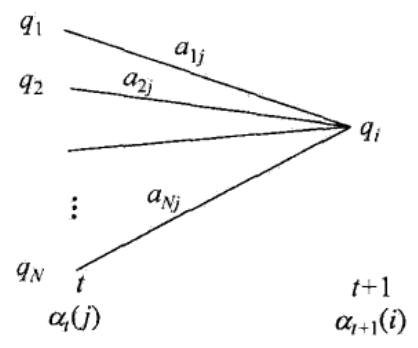

由图可得，前向算法的计算过程为：

1)、初始值，时刻1时，利用$\pi$和观测到的第一个值，得到初始概率$\alpha_1(i)=\pi(i)*b_1(o_1),i \in 1 to N$

2)、时刻t=1,...T-1，$\alpha_{t+1}(i)=\sum_{j=1}^N\alpha_t(j)a_{j,i}b_i(o_{t+1})$

3)、终止，$P(O|\lambda)=\sum_{i=1}^N\alpha_T(i)$


**2、后向算法**

后向算法中，定义$\beta_t(i)$表示的是在时刻t，状态为$q_i$的条件下，从$t+1$到$T$的部分观测序列为$o_{t+1},o_{t+2},...,o_T$的概率为后向概率，即$\beta_t(i)=P(o_{t+1},o_{t+2},...,o_T|i_t=q_i, \lambda)$。

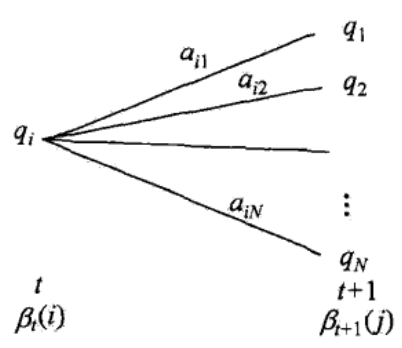

由定义可知，$\beta_T(i)=1$，那么对于t=T-1,T-2,...1,$$\beta_t(i)=\sum_{j=1}^Na_{i,j}b_j(o_{t+1})\beta_{t+1}(j)$$

所以，$P(O|\lambda)=\sum_{i=1}^N\pi_ib_i(o_1)\beta_1(i)$

**Q3:有了前后向算法，还能得到什么信息？**

0、有了前后向的定义，可以得到观测序列的概率值$P(O|\lambda)$

$$P(O|\lambda)=\sum_{i=1}^N\sum_{j=1}^N\alpha_t(i)a_{i,j}b_j(o_{t+1})\beta_{t+1}(j)$$

1、给定模型$\lambda$和观测序列$O$，求在t时刻状态为$q_i$的概率：
$$\gamma_t(i)=P(i_t=q_i|O, \lambda)\\
=\frac{P(i_t=q_i,O|\lambda)}{P(O|\lambda)}$$
根据前后向算法的定义，$\alpha_t(i)\beta_t(i)$就可以理解为给定模型$\lambda$条件下，观测为$o_1,..o_t$且时刻t状态为$q_i$的概率，也即$P(i_t=q_i,O|\lambda)$。

所以$$\gamma_t(i)=\frac{\alpha_t(i)\beta_t(i)}{\sum_{j=1}^N\alpha_t(j)\beta_t(j)}$$


2、给定模型$\lambda$和观测序列$O$，从t时刻的状态i转移到t+1时刻的状态j的概率：
$$\xi_t(i,j)=P(i_t=q_i,i_{t+1}=q_j|O, \lambda)\\
=\frac{P(i_t=q_i,i_{t+1}=q_j, O|\lambda)}{P(O|\lambda)}\\
=\frac{P(i_t=q_i,i_{t+1}=q_j, O|\lambda)}{\sum_{i=1}^N\sum_{j=1}^NP(i_t=q_i,i_{t+1}=q_j, O| \lambda)}$$
且存在$P(i_t=q_i,i_{t+1}=q_j, O|\lambda)=\alpha_t(i)a_{i,j}b_{j}(o_{t+1})\beta_{t+1}(j)$

所以
$$\xi_t(i,j)=\frac{\alpha_t(i)a_{i,j}b_{j}(o_{t+1})\beta_{t+1}(j)}{\sum_{i=1}^N\sum_{j=1}^N\alpha_t(i)a_{i,j}b_{j}(o_{t+1})\beta_{t+1}(j)}$$


3、期望值

求观测序列O下，状态i出现的期望值: $\sum_{t=1}^T\gamma_t(i)$

求观测序列O下，由状态i转移的期望值:$\sum_{t=1}^{T-1}\gamma_t(i)$

求观测序列O下，由状态i转移到状态j的期望值:$\sum_{t=1}^{T-1}\xi_t(i,j)$

**Q4:参数估计方法？**


Complete VS lncomplete "Z"

Z就是隐变量, X是对应的观测值.

X已知, Z已知, 则通过简单的频率统计即可求解出参数

X已知, Z未知, 则通过EM算法求解. (E步更新发射概率, M步更新参数值, 这样循环交替直到收敛, 即得参数；**说白了就是，先猜测一个隐变量的值，使其变成显式变量，然后计算似然值，更新参数，直到似然值不再变大，即得到最优的参数。**)

------------

EM算法是最常见的隐变量估计方法，由两个部分组成

第一部分是Expectation，求隐变量在可观测变量和该模型下的期望$E_{Z|X,\theta}$；

**极大似然估计**

由于独立同分布，$L(\theta) = \prod_{i=1}^N P(x_i|\theta)$，令L最大，且为了方便求解，两边求对数，即
    $$l(\theta)=\sum_{i=1}^NlnP(x_i|\theta)$$
然后求导，即得到使L最大的参数值。


**Jenson不等式**

$E(f(X)) \geq f(E(x))$，当且仅当X是常量时，该式取等号。其中，E(X)表示X的数学期望。

第二部分是Maximum，即得到最大化第一部分期望的参数。

EM算法中，需要构造Q函数，以构造Jenson不等式的情况，将隐变量的似然函数转变成期望的似然。

总结一下：

1)、随机初始化模型参数θ的初值

2)、迭代

   E步：计算联合分布的条件概率期望
   
   构造$Q_i(z_i)=P(z_i|x_i, \theta)$
   
   似然函数$l(\theta, \theta_j)=\sum_{i=1}^N\sum_{z_i}Q_i(z_i)log\frac{P(x_i, z_i|\theta)}{Q_i(z_i)}$
   
3)、最大化$l(\theta, \theta_j)$，更新参数

4)、若迭代次数用尽或已经收敛则结束。



监督学习算法时，即除了观测序列外，还知道任意时刻的状态转移情况、发射情况，采用极大似然估计，即统计转移i -> j的频数，再除以总数。同样的，发射概率也可以统计得到。

非监督学习时，即只有观测序列，不知道转移时的状态情况，则采用Baum-Welch算法。Baum-Welch是EM算法的一种特征。


对HMM进行参数估计，即对$(\pi, A, B)$进行估计，其中A代表转移概率，B代表发射概率，$\pi$为初始概率.

分开来讲：

1、转移概率，即在t时刻从状态i转移到t+1时刻的状态j

$$P(i_t=q_i,i_{t+1}=q_j|O, \lambda)=\xi_t(i,j)$$

对其进行估计，参考监督学习中的频数方式，需要考虑所有时刻即

$$\hat{a}_{i,j}=\frac{从i且转移到j的期望次数}{从i转移的期望次数}\\
=\frac{\sum_{t=1}^{T-1}\xi_t(i,j)}{\sum_{t=1}^{T-1}\sum_{j=1}^N\xi_t(i,j)}$$


2、发射概率，即在t时刻从状态j发射观测$v_k$的概率
$$P(v_t=v_k|i_t=q_j,O,\lambda)=\frac{P(v_t=v_k,i_t=q_j|O,\lambda)}{P(i_t=q_j|O,\lambda)}\\
=\frac{1/0}{\gamma_t(j)}$$

又需要考虑全部时刻进行估计，所以

$$\hat{b}_{j}(v_k)=\frac{到达j且发射v_k的期望次数}{到达j的期望次数}
\\=\frac{\sum_{t=1}^T\gamma_t(j)I(v_t=v_k)}{\sum_{t=1}^{T}\gamma_t(j)}$$



In [1]:
# EM实现HMM估计
import numpy as np


def forward(V, a, b, initial_distribution):
    '''
    params V:观测变量，(T, 1)
    params a:转移矩阵, (N, N)
    params b:发射矩阵, (N, M)
    params initial_distribution: pi
    '''
    # 前向概率
    alpha = np.zeros(V.shape[0], a.shape[0])
    alpha[0,:] = initial_distribution * b[:, V[0]]
    
    for t in range(1, V.shape[0]):
        for j in range(a.shape[0]):
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]
    
    return alpha

def backward(V, a, b):
    '''
    params V:观测变量，(T, 1)
    params a:转移矩阵, (N, N)
    params b:发射矩阵, (N, M)
    '''
    beta = np.zeros((V.shape[0], a.shape[0]))
    beta[V.shape[0] - 1] = np.ones((a.shape[0]))
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])
    
    return beta

def em_learning(V, a, b, initial_distribution, n_iter=100):
    M = a.shape[0]
    T = len(V)
 
    for n in range(n_iter):
        # alpha_t(i) = P(O_1 O_2 ... O_t, q_t = S_i | hmm)
        # Initialize alpha
        alpha = forward(V, a, b, initial_distribution)
        
        # beta_t(i) = P(O_t+1 O_t+2 ... O_T | q_t = S_i , hmm)
        # Initialize beta
        beta = backward(V, a, b)
 
        # ξ_t(i,j)=P(i_t=q_i,i_{i+1}=q_j|O,λ)
        xi = np.zeros((M, M, T - 1))
        for t in range(T - 1):
            denominator = np.dot(np.dot(alpha[t, :].T, a) * b[:, V[t + 1]].T, beta[t + 1, :])
            for i in range(M):
                numerator = alpha[t, i] * a[i, :] * b[:, V[t + 1]].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator
 
        # γ_t(i)：gamma_t(i) = P(q_t = S_i | O, hmm)
        gamma = np.sum(xi, axis=1)
        a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))
 
        # Add additional T'th element in gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))
 
        K = b.shape[1]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            b[:, l] = np.sum(gamma[:, V == l], axis=1)
 
        b = np.divide(b, denominator.reshape((-1, 1)))
 
    return {"a":a, "b":b}
 

HMM的预测问题，即给定观测序列O和模型$\lambda$，求有有可能的状态序列I，也即$P(I|O, \lambda)$。可用两种方法解决。一种是近似算法，另一种是维特比算法。

**1、近似算法**

即在每个时刻选择最有可能的状态i，从而得到一个状态序列。即
$$i_t^*=argmax[\gamma_t(i)]$$


**2、维特比算法**

维特比算法是利用动态规划的思想，求概率最大路径。其思路为：

**递推+回溯。**

递推：从$t=1$开始，逐步计算时刻t状态i的各条路径的最大概率$\delta_t(i)$，并且对应的上一个时刻t-1的最佳状态，记为$\psi_t(i)$，直到最后一步T时刻状态为i的最大概率。

选出T时刻的最优值$i_{best,T} = argmax(\delta_T(i))$，以及上一步的最佳状态$\psi_T(i_{best,T})$

回溯：根据$\psi_t(i)$的记录，从$t=T$开始回溯。


定义：在时刻$t$隐藏状态为$i$，所有可能的状态转移路径$i_1,i_2,...,i_{t-1}$中的概率最大值为：
$$\delta_t(i) = max( P(j_t=i,j_{t-1}=i_{t-1},...,j_1=i_1|\lambda))$$

即
$$\delta_{t+1}(i)=max (\delta_t(j)a_{j,i}b_i(o_{t+1}))$$

另外，定义$\psi_t(i)$表示时刻$t$，状态$i$的所有单个状态转移路径$(i_1,i_2,...i_{t-1})$中，概率最大的转移路径中第$t-1$节点的隐藏状态节点为$\psi_t(i)$，且
$$\psi_t(i)=argmax \delta_{t-1}(j)a_{j,i}, 1 \leq j \leq N$$



In [2]:
def veterbi(V, a, b, initial_distribution):
    '''
    params V:观测变量，(T, 1)
    params a:转移矩阵, (N, N)
    params b:发射矩阵, (N, M)
    params initial_distribution: pi
    '''
    N = a.shape[0]
    T = V.shape[0]
    prev = np.zeros((T - 1, N), dtype=int)

    # DP matrix containing max likelihood of state at a given time
    delta = np.zeros((N, T))
    delta[:,0] = initial_distribution * b[:, V[0]]
    
    for t in range(1, T):
        for n in range(N):
            seq_probs = delta[:,t-1] * a[:,n] * b[n, V[t]]
            prev[t-1,n] = np.argmax(seq_probs)
            delta[n,t] = np.max(seq_probs)

    return delta, prev

def build_viterbi_path(prev, last_state):
    """Returns a state path ending in last_state in reverse order.
    最优路径回溯
    """
    T = len(prev)
    yield(last_state)
    for i in range(T-1, -1, -1):
        yield(prev[i, last_state])
        last_state = prev[i, last_state]
        

In [66]:
A = np.array([[0.5, 0.5],[0.7, 0.3]])
B = np.array([[0.2, 0.3, 0.5],[0.4, 0.2, 0.4]])
pi = np.array([0.3, 0.7])

V = np.array([1, 1, 1])

V.shape[0], A.shape[0]

(3, 2)

In [67]:
delta, prev = veterbi(V, A, B, pi)
delta, prev

(array([[0.09   , 0.0294 , 0.00441],
        [0.14   , 0.009  , 0.00294]]),
 array([[1, 0],
        [0, 0]]))

In [59]:
for i in build_viterbi_path(prev, np.argmax(delta[:, -1])):
    print(i)

0
0
1


In [56]:
prev

array([[1, 0],
       [0, 0]])